In [42]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
df=pd.read_csv('Advertising.csv')

In [44]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
129,130,59.6,12.0,43.1,9.7
59,60,210.7,29.5,9.3,18.4
35,36,290.7,4.1,8.5,12.8
3,4,151.5,41.3,58.5,18.5
40,41,202.5,22.3,31.6,16.6


In [45]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [47]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [48]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


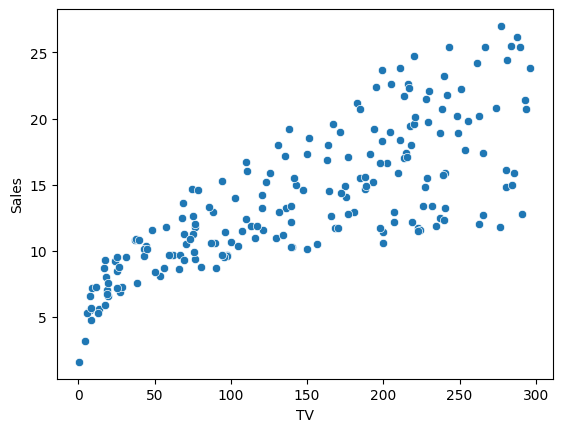

In [49]:
sns.scatterplot(x=df['TV'],y=df['Sales'])
plt.show()

In [50]:
x=df.iloc[:,:-1]
y=df['Sales']

In [51]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [52]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [65]:
x_train.shape,x_test.shape

((150, 3), (50, 3))

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr=LinearRegression()

In [61]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
y_pred=lr.predict(x_test)

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

MSE : 2.88
MAE : 1.40
RMSE : 1.70


In [64]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(f"R2_Score : {r2:.2f}")
adjust_r2=1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"Adjust R2 : {adjust_r2:.2f}")

R2_Score : 0.89
Adjust R2 : 0.89


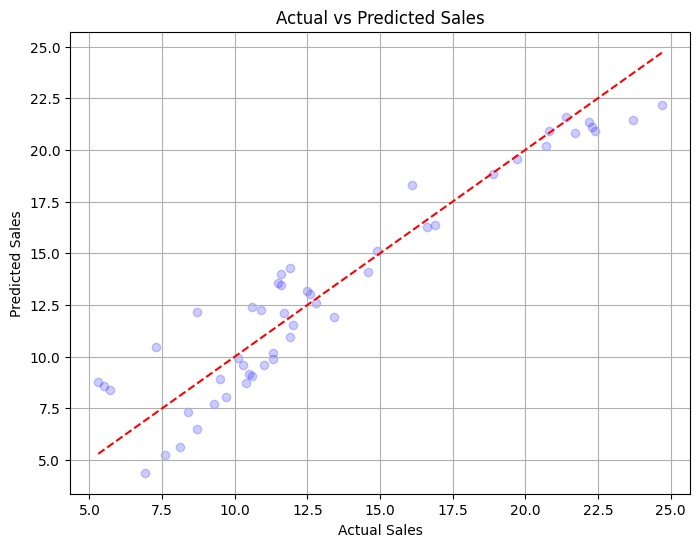

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.2, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.savefig("plot.png") 
plt.show()